## This session in used to show how to use geopandas for spatial data processing

The pandas package has made data manipulation and analysis far easier in Python. But what happens when you need to analyse and manipulate geospatial data? This tutorial will walk you through the use of GeoPandas to manipulate spatial data and do spatial analysis.

The geopandas package wraps serveral other open source modules, pandas, fiona, and shapely. It makes  spatial data manipulations much easier, although it has its own capability and it is not as flexible as fiona and shapely. It is good to start with geopandas if you are not familar with using open source tools for spatial analysis.

This notebook assumes you already have the following packages installed: pandas, geopandas, mapclassify, descartes

In this session, you will learn how to:

1.  Read vector datasources with GeoPandas
1.  Reprojection vector layers
1.  Spatially join spatial layers
1.  Create maps using GeoPandas


Read the shapefile of traffic accident data in Philadelphia

In [1]:
import geopandas as gpd
import time

t0 = time.time()
# geopandas will read the shapefile into a data frame with the geometric information
accident = gpd.read_file("data/crash_data_collision_crash_2007_2017.gpkg")
print(time.time() - t0)

17.562082052230835


Get the coordinate reference system (CRS) information

In [2]:
accident.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Read the census tract shapefile

In [3]:
censusMap = gpd.read_file("data/census-tract-data.gpkg")

censusMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Reproject shapefile into a new projection
In order to do spatial join of the traffic accident and the census tract data, we need to make sure different shapefiles are in the same projection.

In [4]:
accident_reprojected = accident.to_crs('EPSG:4269')

accident_reprojected.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05770 40.06280)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96690 40.08220)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19460 39.97510)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21710 40.03570)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210 39.95110)


### Filter out some records
Let just extract the traffic accident records in 2015

In [5]:
accident_2015 = accident_reprojected.loc[accident_reprojected['crash_year'] == 2015] #locate the traffic accident in 2015
accident_2015.head()


,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
22660,None,22661,274853,2015028828,6,67,67301,2015,2,1,...,0,0,0,4,0,39.9765,-75.1894,None,None,POINT (-75.18940 39.97650)
22661,None,22662,274856,2015030569,6,67,67301,2015,2,4,...,0,0,0,4,0,40.0371,-75.1657,None,None,POINT (-75.16570 40.03710)
22662,None,22663,274862,2015038631,6,67,67301,2015,3,5,...,0,0,0,4,0,40.0275,-75.0800,None,None,POINT (-75.08000 40.02750)
22663,None,22664,274891,2015025058,6,67,67301,2015,2,3,...,0,0,0,4,0,39.9238,-75.2397,None,None,POINT (-75.23970 39.92380)
22664,None,22665,274898,2015033754,6,67,67301,2015,2,7,...,0,0,0,8,0,40.0719,-75.0296,None,None,POINT (-75.02960 40.07190)


### Using multiple cretiria to do query

Select traffic accidents on Sunday (day of week = 1) in 2015.

* `|` is or
* `&` is and

In [6]:
accident_2015_firstday = \
    accident_reprojected.loc[(accident_reprojected['day_of_wee'] == 1) & \
                             (accident_reprojected['crash_year'] == 2015)]
accident_2015_firstday.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
22660,None,22661,274853,2015028828,6,67,67301,2015,2,1,...,0,0,0,4,0,39.9765,-75.1894,None,None,POINT (-75.18940 39.97650)
22667,None,22668,274981,2015006060,6,67,67301,2015,1,1,...,0,0,0,0,0,39.9081,-75.1560,None,None,POINT (-75.15600 39.90810)
22704,None,22705,267542,2015051989,6,67,67301,2015,4,1,...,0,0,0,4,0,39.9374,-75.2176,None,None,POINT (-75.21760 39.93740)
22709,None,22710,267605,2015021890,6,67,67301,2015,2,1,...,0,0,0,4,0,39.9069,-75.1938,None,None,POINT (-75.19380 39.90690)
22711,None,22712,267652,2015025067,6,67,67301,2015,2,1,...,0,0,0,4,0,40.0282,-75.1081,None,None,POINT (-75.10810 40.02820)


### Plot the traffic accident map

<AxesSubplot: >

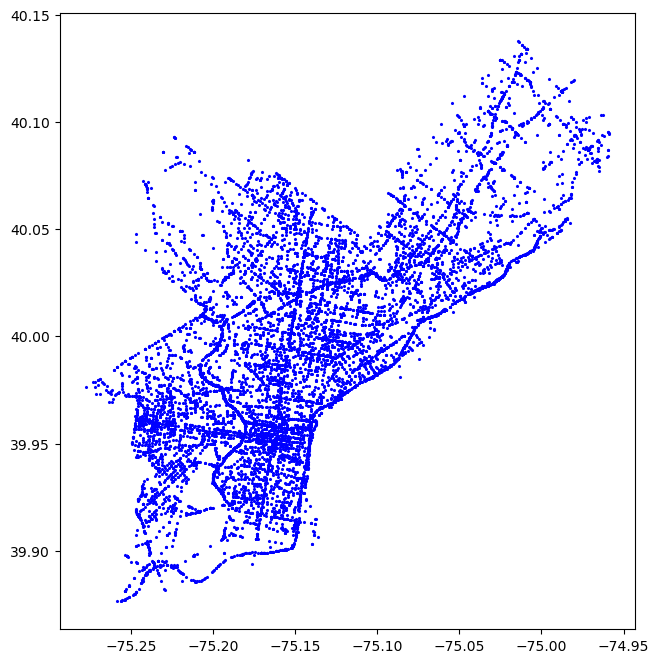

<Figure size 1000x1000 with 0 Axes>

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

plt.figure(figsize=(10, 10))
accident_2015.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=2)

### Map the point map with the basemap of the census tract

You can use `GeoPandas` to map multiple spatial layers.

> Descartes is required for certain GeoPandas features, but is not installed as a GeoPandas dependency. If you followed the course instructions to set up your conda environment, you should be fine, as Descartes is included in the environment's YAML. If you did not use the course instructions and get the message 'No module decartes', you need to install Descartes.
> 
> * You can install it in conda (at the Anaconda Prompt, *not* in this notebook) using `conda install descartes`. You should be able to rerun this notebook without restarting the jupyter notebook server.
> * If you want to embed the installation *in* this notebook, you can run the command `!pip install descartes` in a code cell. See my previous warnings about mixing pip and conda, as well as notebook command sequencing. Also note that the notebook will (harmlessly, but pointlessly) check to see whether Descartes is installed every time you run it.

<AxesSubplot: >

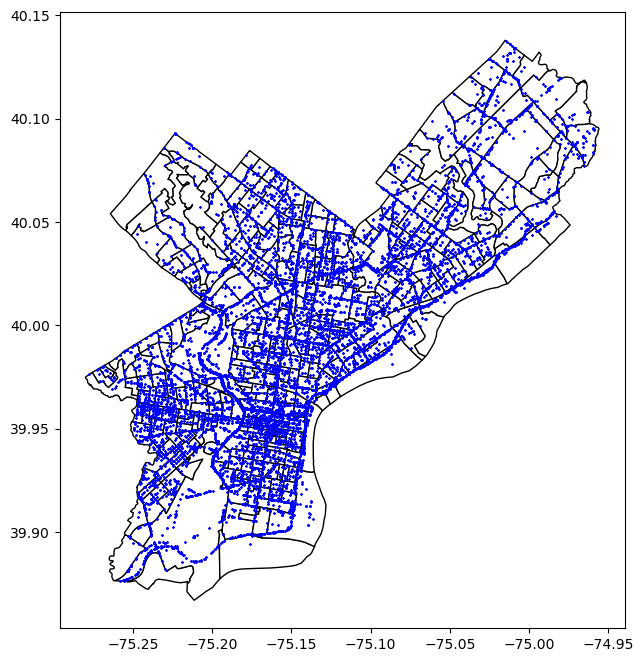

<Figure size 1000x1000 with 0 Axes>

In [8]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

plt.figure(figsize=(10, 10))

censusMap.plot(ax=ax, color='white', edgecolor='black')

accident_2015.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=1)

### Spatial Join
The map doesn't give a clear spatial pattern of the the traffic accidents. We can first aggregate the point to census tract and create a choropleth map.

In [9]:
# because the geodataframes are in the same projection, we can do a spatial join

joined = gpd.sjoin(accident_2015, censusMap, how='left', op='intersects')
print(joined.head())

      county_nam  objectid_1  objectid         crn  district  county_left  \
22660       None       22661    274853  2015028828         6           67   
22661       None       22662    274856  2015030569         6           67   
22662       None       22663    274862  2015038631         6           67   
22663       None       22664    274891  2015025058         6           67   
22664       None       22665    274898  2015033754         6           67   

       municipali  crash_year  crash_mont  day_of_wee  ...  male85_  \
22660       67301        2015           2           1  ...        0   
22661       67301        2015           2           4  ...       23   
22662       67301        2015           3           5  ...        0   
22663       67301        2015           2           3  ...        0   
22664       67301        2015           2           7  ...        6   

       fema_65_66  fema_67_69  fema70_74  fema75_79  fema80_84  fema85_ state  \
22660           3           0

### Group by tract
Count the number of traffic accidents in each census tract

In [10]:
results = joined.groupby('tract').size().to_frame('size')
print(results)


        size
tract       
000100    75
000200    44
000300    97
000401    27
000402    49
...      ...
980600    17
980700   137
980800    13
980900   395
989100    75

[383 rows x 1 columns]


### Merge the stand alone table with the shapefile

The spatial joined table is a table not a shapefile. In order to create a map, we need to assign coordinate information to the traffic accident data by census tract. We can use `Merge` to create a shapefile with the traffic accident informaiton. 

In [11]:
import pandas as pd

## Merge the accident data to the shapefile
traffic_accident = pd.merge(censusMap, results, on="tract")

# traffic_accident.head()

/home/lee/miniconda3/envs/geospatial/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: >

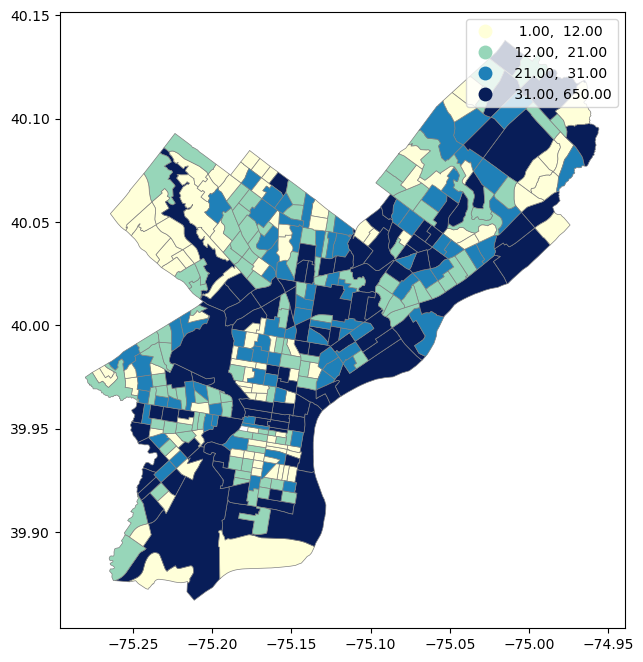

In [12]:
import mapclassify as mc

# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

traffic_accident.plot(column='size', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         legend=True,
                         k=4, #the number of classes
                         scheme='quantiles') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


Save the new geopandas dataframe to a GeoPackage.

In [13]:
traffic_accident.to_file("output/trafficAccidentByCensusTract.gpkg", driver = "GPKG")


/home/lee/miniconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Reference:

1. GeoPandas tutorial: http://geopandas.org/index.html
2. AutoGIS Document: https://automating-gis-processes.github.io/2016/Lesson2-geopandas-basics.html
3. Python Foundation for Spatial Analysis, https://courses.spatialthoughts.com/python-foundation.html

### Homework

Plot the spatial distribution of traffic accidents for any specific date (day, month, and year) at the census tract level. Hint: Use `&` and `|` to create a query with multiple criteria.

Then use a spatial join to get the number of accidents at the census tract level.
